# Sales Analysis

## Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

#### Task 1: Merge 12 months of sales data into a single csv file

In [ ]:
files = [file for file in os.listdir("/content/drive/MyDrive/sales_data")]

all_months_data = pd.DataFrame()

for file in files:
  df = pd.read_csv("/content/drive/MyDrive/sales_data/"+file)

  all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index=False)

In [ ]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


### Clean up the data!

#### Drop rows of NAN

In [ ]:
all_data.shape

(186850, 6)

In [ ]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


#### Find 'Or' and delet it

In [ ]:
all_data.shape

(186305, 6)

In [ ]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [ ]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [ ]:
all_data.shape

(185950, 6)

#### Convert columns to the correct type

In [ ]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])  # Make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # Make float

### Augment data with additional columns

### Task 2: Add Month Column

In [ ]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


#### Task 3: Add a sales column

In [ ]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


#### Task 4: Add a city column

In [ ]:
# Let´s use .apply
def get_city(address):
  return address.split(',')[1]

def get_state(address):
  return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX)


### Question 1: What was the best month for sales?  How much was earned that month?

In [ ]:
results = all_data.groupby('Month').sum()

<ipython-input-16-d9e765394c87>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('Month').sum()


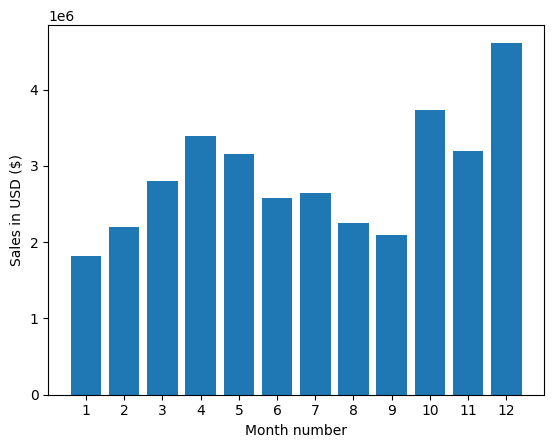

In [ ]:

months = range(1, 13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

<Axes: xlabel='Month', ylabel='Sales'>

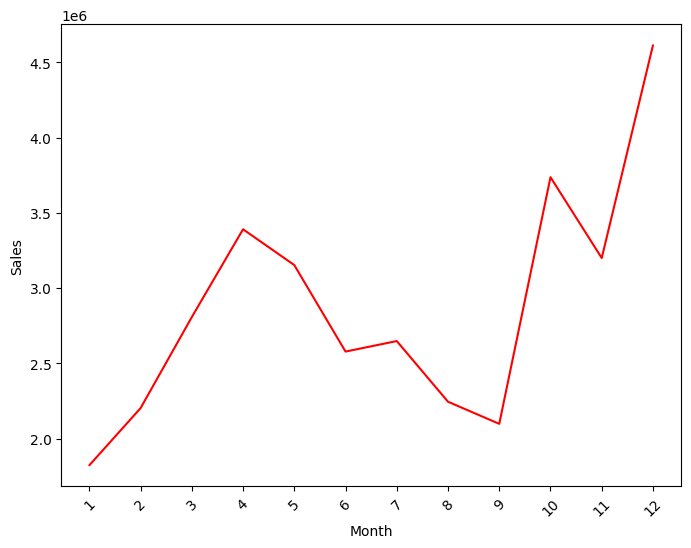

In [ ]:
plt.figure(figsize=(8, 6))
plt.xticks(months)
plt.xticks(rotation=45)
sns.set_theme(style="darkgrid")
sns.lineplot(data=results, x='Month', y='Sales', color='red')

#### Question 2: What city had the highest number of sales?

In [ ]:
results = all_data.groupby('City').sum()
results

<ipython-input-19-7385b3f009b8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('City').sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


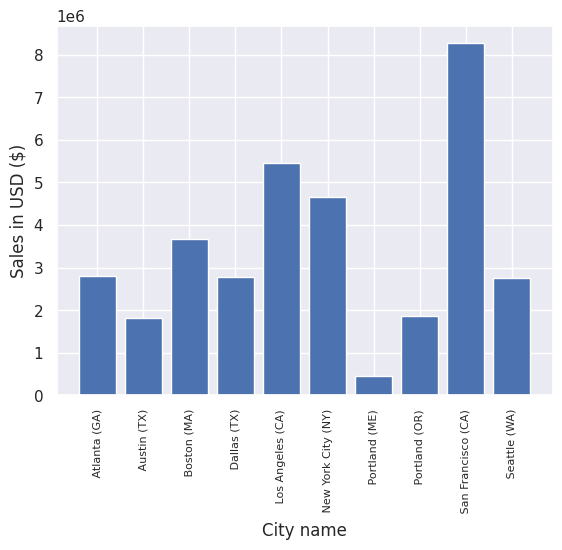

In [ ]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation = 'vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')
plt.show()

<Axes: xlabel='City', ylabel='Sales'>

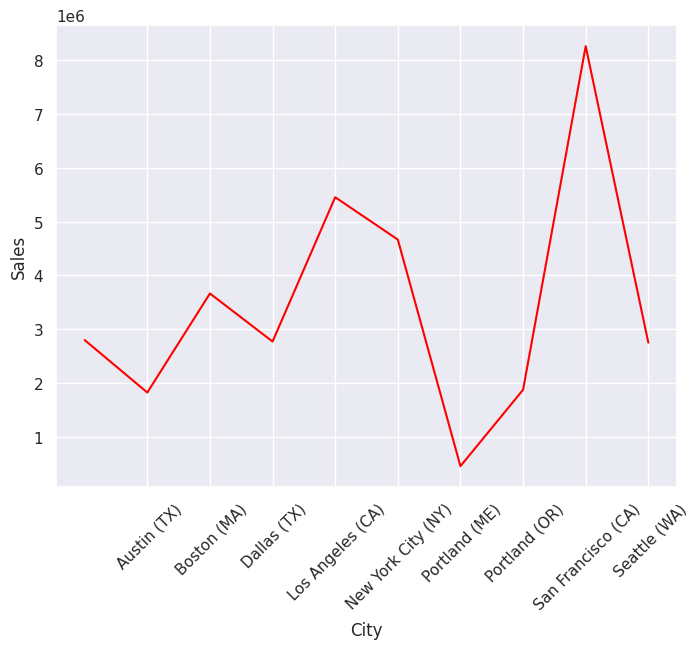

In [ ]:
plt.figure(figsize=(8, 6))
plt.xticks(months)
plt.xticks(rotation=45)
sns.set_theme(style="darkgrid")
sns.lineplot(data=results, x='City', y='Sales', color='red')

<Axes: xlabel='Sales'>

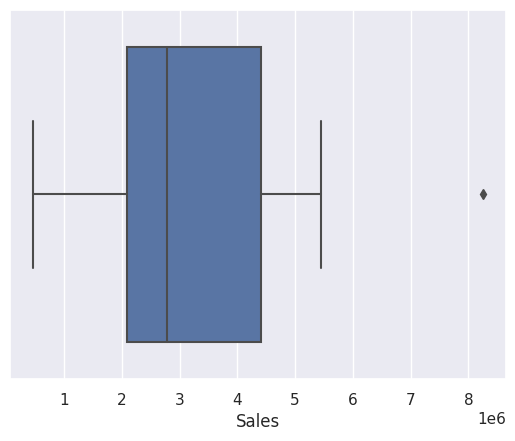

In [ ]:
sns.boxplot(data=results, x='Sales')

#### Question 3: What time should we display advertisements to maximize likelihood of customer´s buying product?

In [ ]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [ ]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA),21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR),14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA),13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA),20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX),11,59


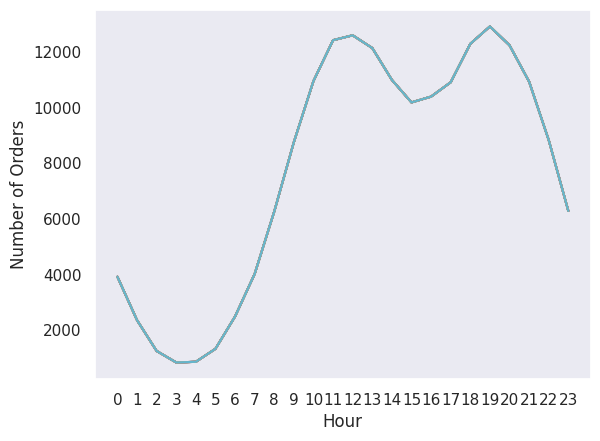

In [ ]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

# My recommendation is around 11am (11) or 7pm (19)

#### Question 4: What products are most often sold together?

In [ ]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

<ipython-input-26-7d8ccab84436>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


In [ ]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
  print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5: What product sold the most?  Why do you think it sold the most?

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA),21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR),14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA),13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA),20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX),11,59


<ipython-input-29-fd69419bcb90>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


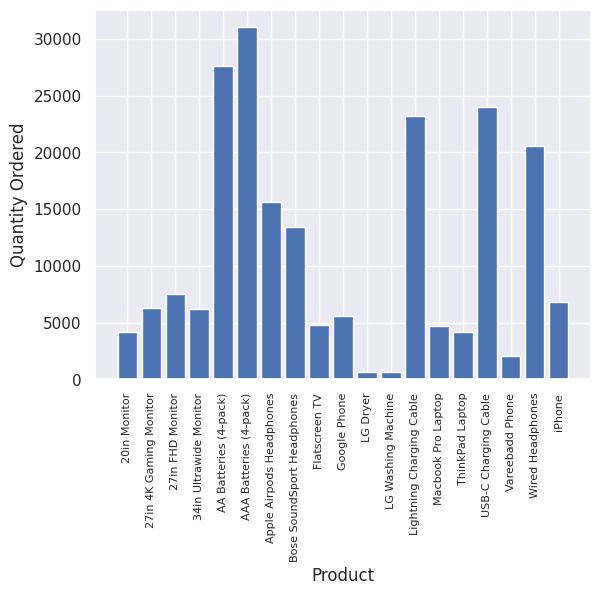

In [ ]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation='vertical', size=8)
plt.show()

<ipython-input-30-20ffe5484fa9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']
<ipython-input-30-20ffe5484fa9>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


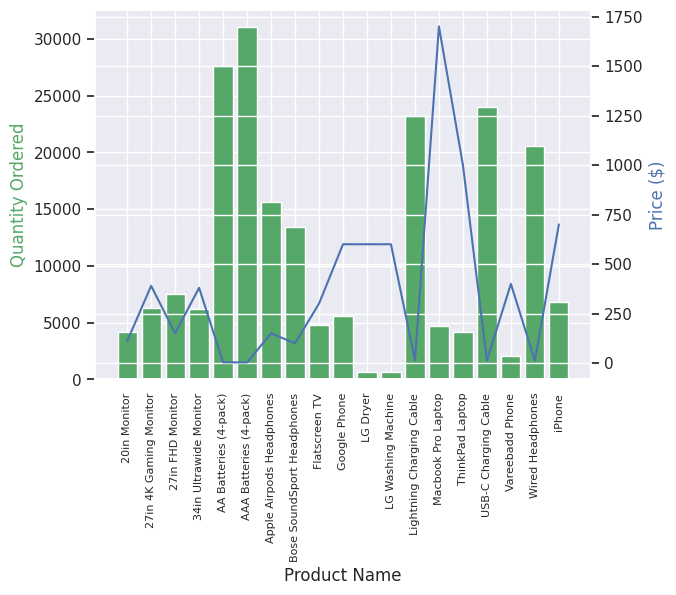

In [ ]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

### Other Graphical Analysis with seaborn

#### As bases de dados podem ser carregadas do github no link: https://github.com/mwaskom/seaborn-data

In [ ]:
voos = sns.load_dataset("flights")
voos.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
titanic = sns.load_dataset("titanic")
titanic.head

<bound method NDFrame.head of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_mal

In [ ]:
acidentes =sns.load_dataset("car_crashes")
acidentes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA),21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR),14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA),13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA),20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX),11,59


#### Bar Chart

In [ ]:
titanic.head

<bound method NDFrame.head of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_mal

In [ ]:
df_por_sexo = titanic.groupby('sex')['survived'].sum().reset_index()
df_por_sexo

,sex,survived
0,female,233
1,male,109


<Axes: xlabel='sex', ylabel='survived'>

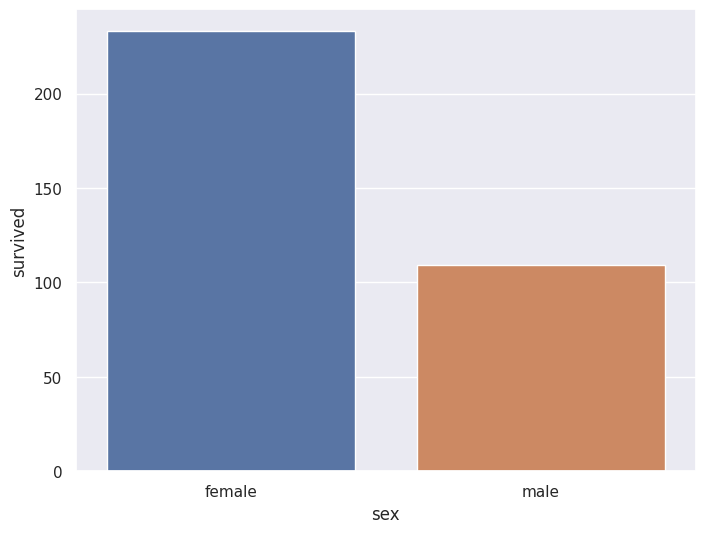

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df_por_sexo, x='sex', y='survived')

<Axes: xlabel='sex', ylabel='count'>

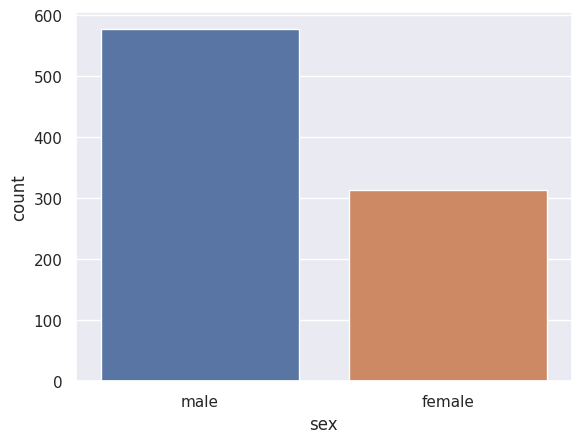

In [ ]:
sns.countplot(data=titanic, x='sex')

<Axes: xlabel='survived', ylabel='count'>

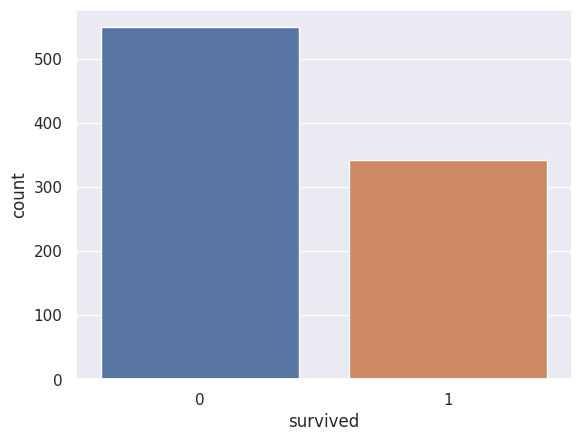

In [ ]:
sns.countplot(data=titanic, x='survived')

#### Histogram

<Axes: xlabel='age', ylabel='Count'>

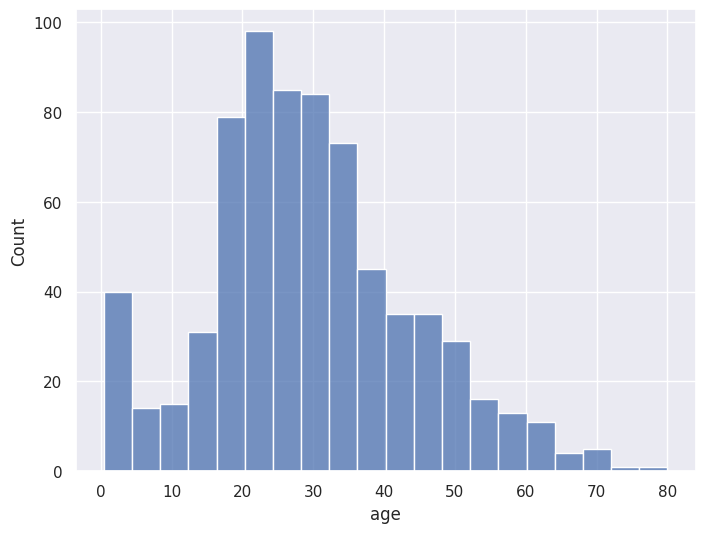

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=titanic, x='age')

#### Boxplot

In [ ]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
df_titanic = titanic.dropna()

In [ ]:
df_titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [ ]:
idades_com_outlier = list(df_titanic['age'])
idades_com_outlier.append(120)

In [ ]:
df_titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735
std,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


<Axes: xlabel='age'>

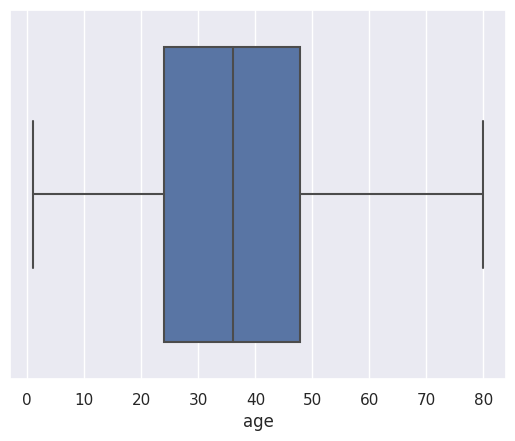

In [ ]:
sns.boxplot(data=df_titanic, x='age')

<Axes: >

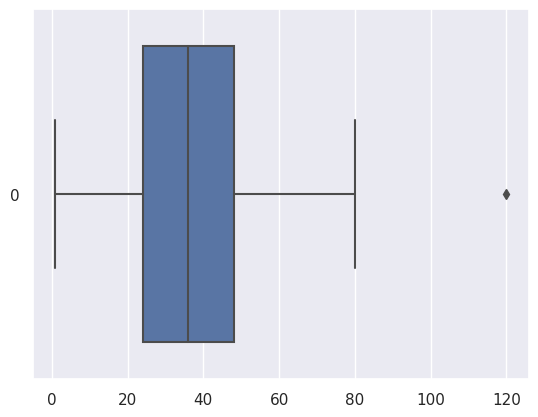

In [ ]:
sns.boxplot(data=idades_com_outlier, orient='h')

<Axes: >

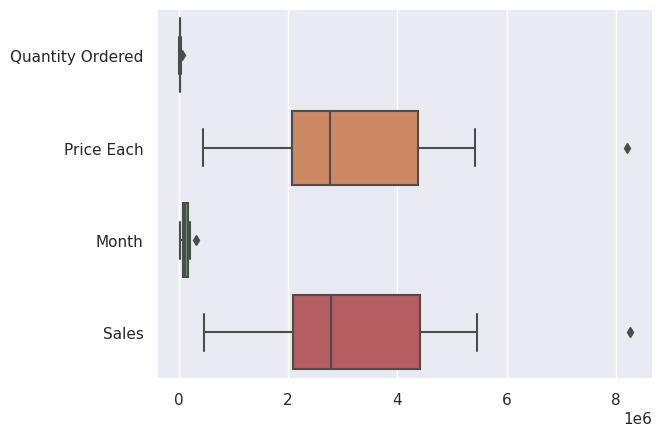

In [ ]:
sns.boxplot(data=results, orient='h')

<Axes: xlabel='Sales'>

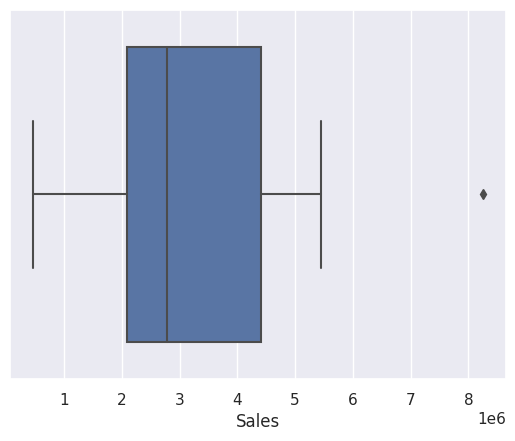

In [ ]:
sns.boxplot(data=results, x='Sales')

#### Mapas de Calor (heatmap)

In [ ]:
voos.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
voos = voos.pivot("month", "year", "passengers")
voos.head()

<ipython-input-51-fa6f4970ab47>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  voos = voos.pivot("month", "year", "passengers")


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


<Axes: xlabel='year', ylabel='month'>

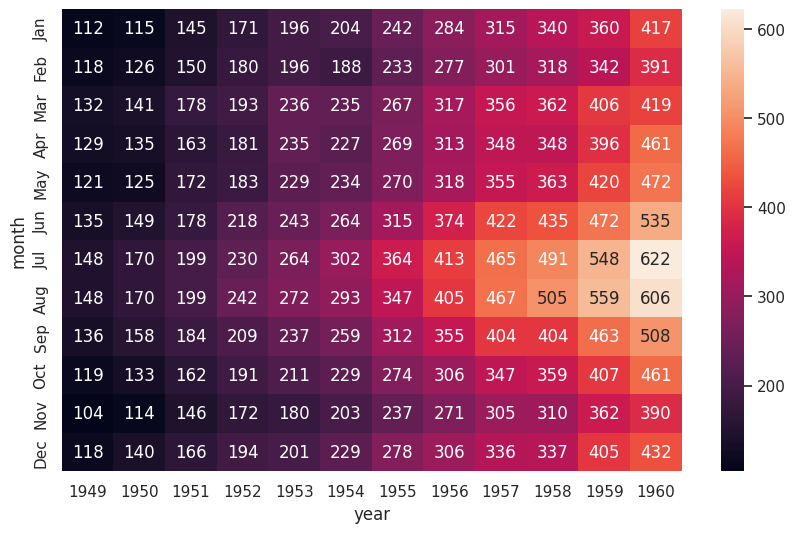

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=voos, annot=True, fmt='.0f')

<Axes: xlabel='year', ylabel='month'>

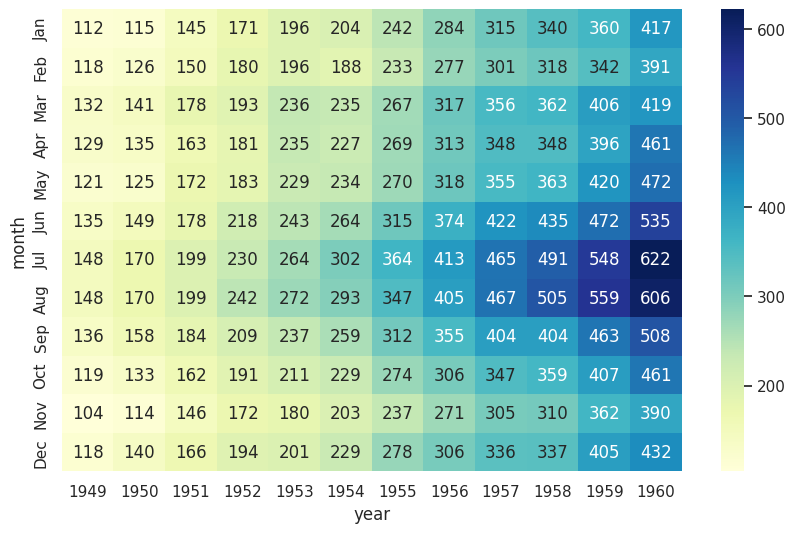

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=voos, annot=True, fmt='.0f', cmap="YlGnBu")

<Axes: xlabel='year', ylabel='month'>

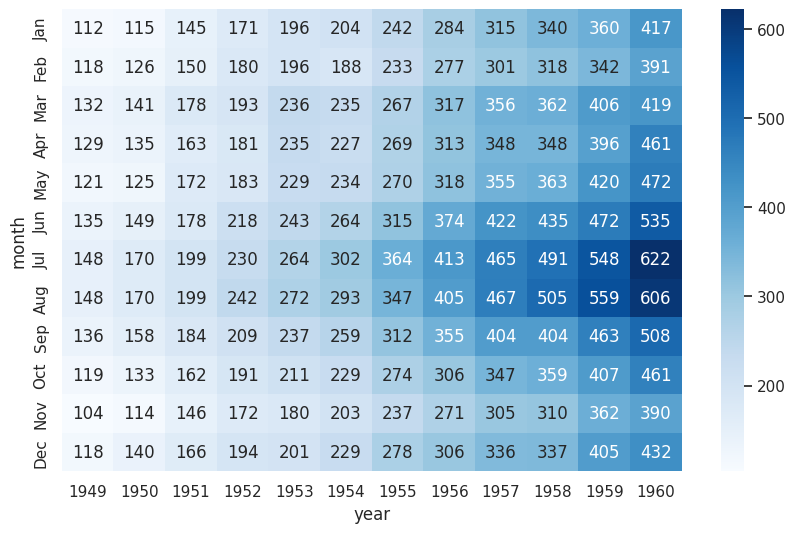

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=voos, annot=True, fmt='.0f', cmap="Blues")

#### Gráfico de dispersão com regressão linear

In [ ]:
acidentes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


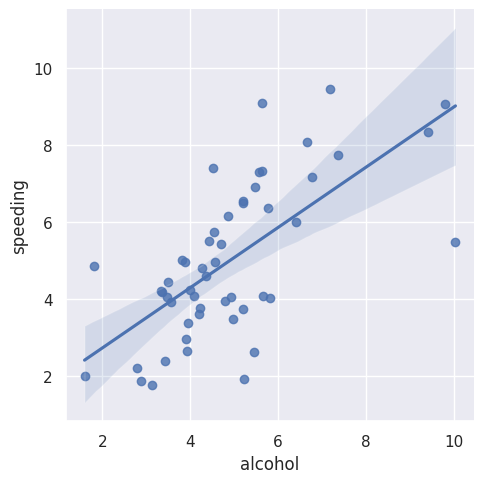

In [ ]:
sns.lmplot(data=acidentes, x='alcohol', y='speeding')

## Other Graphical Analysis with Plotly

In [ ]:
import plotly.express as px

In [ ]:
df_bitcoin = pd.read_csv('https://datahub.io/cryptocurrency/bitcoin/r/bitcoin.csv')
df_bitcoin.head()

,date,txVolume(USD),adjustedTxVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,averageDifficulty,paymentCount,medianTxValue(USD),medianFee,blockSize,blockCount
0,2009-01-09,NaN,NaN,0,NaN,NaN,NaN,700.0,0.0,14,1.0,NaN,NaN,NaN,3010,14
1,2009-01-10,NaN,NaN,0,NaN,NaN,NaN,3050.0,0.0,61,1.0,NaN,NaN,NaN,13129,61
2,2009-01-11,NaN,NaN,0,NaN,NaN,NaN,4650.0,0.0,93,1.0,NaN,NaN,NaN,20033,93
3,2009-01-12,NaN,NaN,7,NaN,NaN,NaN,4700.0,0.0,102,1.0,5.0,NaN,0.0,22031,94
4,2009-01-13,NaN,NaN,0,NaN,NaN,NaN,6150.0,0.0,123,1.0,NaN,NaN,NaN,26527,123


In [ ]:
df_bitcoin.shape

(3605, 16)

In [ ]:
df_bitcoin['price(USD)'].tail(20)

3585    6387.24
3586    6365.47
3587    6363.62
3588    6433.38
3589    6468.50
3590    6522.27
3591    6442.60
3592    6386.13
3593    6413.63
3594    6411.76
3595    6373.19
3596    6351.24
3597    5736.15
3598    5645.32
3599    5578.58
3600    5559.74
3601    5620.78
3602    4863.93
3603    4465.54
3604    4611.57
Name: price(USD), dtype: float64

In [ ]:
df_bitcoin = df_bitcoin.tail(20)

In [ ]:
px.line(data_frame=df_bitcoin, x='date', y='price(USD)')

### Gráfico de Barras

In [ ]:
df_por_sexo = titanic.groupby('sex')['survived'].sum().reset_index()
df_por_sexo

,sex,survived
0,female,233
1,male,109


In [ ]:
px.bar(data_frame=df_por_sexo, x='sex', y='survived')

### Histograma

In [ ]:
px.histogram(data_frame=titanic, x='age')

### Boxplot

In [ ]:
px.box(df_titanic, x='age')

### Gráfico de dispersão

In [ ]:
px.scatter(acidentes, x='alcohol', y='speeding')

In [ ]:
px.scatter(acidentes, x='alcohol', y='speeding', log_y=True)

### Treemap

In [ ]:
medalhas = pd.read_csv('https://raw.githubusercontent.com/abhilampard/Olympics_Dataset/master/olympics.csv', header = 1, index_col=0)

In [ ]:
medalhas.shape

(147, 15)

In [ ]:
medalhas.tail

<bound method NDFrame.tail of                                               # Summer  01 !  02 !  03 !  \
Afghanistan (AFG)                                   13     0     0     2   
Algeria (ALG)                                       12     5     2     8   
Argentina (ARG)                                     23    18    24    28   
Armenia (ARM)                                        5     1     2     9   
Australasia (ANZ) [ANZ]                              2     3     4     5   
...                                                ...   ...   ...   ...   
Independent Olympic Participants (IOP) [IOP]         1     0     1     2   
Zambia (ZAM) [ZAM]                                  12     0     1     1   
Zimbabwe (ZIM) [ZIM]                                12     3     4     1   
Mixed team (ZZX) [ZZX]                               3     8     5     4   
Totals                                              27  4809  4775  5130   

                                              Total  # Wi

In [ ]:
medalhas = medalhas.drop('Totals')
medalhas.tail()

,# Summer,01 !,02 !,03 !,Total,# Winter,01 !.1,02 !.1,03 !.1,Total.1,# Games,01 !.2,02 !.2,03 !.2,Combined total
Yugoslavia (YUG) [YUG],16,26,29,28,83,14,0,3,1,4,30,26,32,29,87
Independent Olympic Participants (IOP) [IOP],1,0,1,2,3,0,0,0,0,0,1,0,1,2,3
Zambia (ZAM) [ZAM],12,0,1,1,2,0,0,0,0,0,12,0,1,1,2
Zimbabwe (ZIM) [ZIM],12,3,4,1,8,1,0,0,0,0,13,3,4,1,8
Mixed team (ZZX) [ZZX],3,8,5,4,17,0,0,0,0,0,3,8,5,4,17


In [ ]:
medalhas = medalhas.sort_values(by=['Combined total'], ascending=False)
medalhas.head()

,# Summer,01 !,02 !,03 !,Total,# Winter,01 !.1,02 !.1,03 !.1,Total.1,# Games,01 !.2,02 !.2,03 !.2,Combined total
United States (USA) [P] [Q] [R] [Z],26,976,757,666,2399,22,96,102,84,282,48,1072,859,750,2681
Soviet Union (URS) [URS],9,395,319,296,1010,9,78,57,59,194,18,473,376,355,1204
Great Britain (GBR) [GBR] [Z],27,236,272,272,780,22,10,4,12,26,49,246,276,284,806
Germany (GER) [GER] [Z],15,174,182,217,573,11,78,78,53,209,26,252,260,270,782
France (FRA) [O] [P] [Z],27,202,223,246,671,22,31,31,47,109,49,233,254,293,780


In [ ]:
medalhas = medalhas.head(20)
medalhas

,# Summer,01 !,02 !,03 !,Total,# Winter,01 !.1,02 !.1,03 !.1,Total.1,# Games,01 !.2,02 !.2,03 !.2,Combined total
United States (USA) [P] [Q] [R] [Z],26,976,757,666,2399,22,96,102,84,282,48,1072,859,750,2681
Soviet Union (URS) [URS],9,395,319,296,1010,9,78,57,59,194,18,473,376,355,1204
Great Britain (GBR) [GBR] [Z],27,236,272,272,780,22,10,4,12,26,49,246,276,284,806
Germany (GER) [GER] [Z],15,174,182,217,573,11,78,78,53,209,26,252,260,270,782
France (FRA) [O] [P] [Z],27,202,223,246,671,22,31,31,47,109,49,233,254,293,780
Italy (ITA) [M] [S],26,198,166,185,549,22,37,34,43,114,48,235,200,228,663
Sweden (SWE) [Z],26,143,164,176,483,22,50,40,54,144,48,193,204,230,627
China (CHN) [CHN],9,201,146,126,473,10,12,22,19,53,19,213,168,145,526
Russia (RUS) [RUS],5,132,121,142,395,6,49,40,35,124,11,181,161,177,519
East Germany (GDR) [GDR],5,153,129,127,409,6,39,36,35,110,11,192,165,162,519


In [ ]:
px.pie(medalhas, names=medalhas.index, values='Combined total')

In [ ]:
px.treemap(medalhas, path=[medalhas.index], values='Combined total')